<a href="https://colab.research.google.com/github/adtitovich/dsml-17/blob/main/m2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

iris_data = load_iris()
iris_df = pd.DataFrame(data = iris_data['data'], columns = iris_data['feature_names'])
iris_df['Iris_type'] = iris_data['target']

 #Iris_type: Iris Versicolor=0; Iris Virginica=1
iris_df['Iris_type'] -= 1 
iris_df = iris_df[iris_df['Iris_type'] >= 0]
iris_df.reset_index(drop=True, inplace=True)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris_type
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0


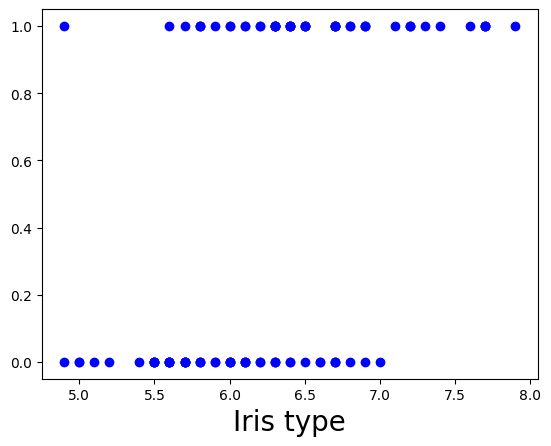

In [53]:
import matplotlib.pyplot as plt

y = iris_df['Iris_type']
x1 = iris_df['sepal length (cm)']

plt.scatter(x1, y, color="blue")
plt.xlabel('sepal length', fontsize=20)
plt.xlabel('Iris type', fontsize=20)

plt.show()

In [56]:
# Sigmoid function
def sigm(z):
    return 1.0/(1.0+np.exp(-z))


def logloss(theta, x, y):  
     
    m = len(y)
    h_theta = sigm(x.dot(theta))
    J = (1.0/m)* (((-y).transpose()).dot(np.log(h_theta)) - (1.0 -y.transpose()).dot(np.log(1.0-h_theta)))
    grad = grad = (1.0/m)* x.transpose().dot(h_theta - y)    
    #return J, grad
    print 'Cost at theta:', str(J[0,0])
    print 'Gradient at theta:','\n', str(grad[0,0]),'\n', str(grad[1,0]),'\n', str(grad[2,0])


0.5

In [59]:
arr = np.array([3, 1, 9])
arr1 = np.array([2, 6, 4])
arr2 = np.dot(arr, arr1)

arr2

48

In [63]:
data = pd.read_csv('https://raw.githubusercontent.com/IraAI/Machine-learning-by-Andrew-NG--Python-/master/ex2data1.txt', header = None)
data = np.array(data)
X = data[:, [0,1]] 
y = data[:, [2]]

In [66]:
X = np.insert(X, 0, values=1, axis=1)
theta = np.zeros((X.shape[1],1))

In [69]:
in_theta = np.zeros((X.shape[1],1))
in_theta

array([[0.],
       [0.],
       [0.]])